<a href="https://colab.research.google.com/github/D1N3SH-DEV/Forecasting_Tata_Motors/blob/main/RMCA2_Tata_Motors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A complete data analysis and forecasting using different models integrated with correlation, regression and index on Tata Motors**

**Data Retrieval:**

We can use Python libraries like yfinance to fetch historical stock price data for Tata Motors from Yahoo Finance, and import other scientific libraries to do the correlation, regression, calculating index and matplotlib for plots.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import pearsonr
import yfinance as yf

# Defining the stock symbol and date range
symbol = "TATAMOTORS.NS"
start_date = "2010-01-01"
end_date = "2021-09-01"

# Fetching historical data
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


**Top View of the Data retirieved with the head function with contraint of '50' used which shows the first 50 records of a dataframe which is directly extracted from Yahoo Finance for Tata Motors.**

In [145]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,156.303482,164.040497,156.184769,163.535919,152.664993,27906448
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.004959,23669317
2010-01-06,162.200241,162.932388,159.311234,160.933823,150.235855,14990820
2010-01-07,161.171280,161.923218,154.344498,155.432831,145.100571,22722030
2010-01-08,156.323273,159.251862,155.343781,156.283707,145.894867,16495776
2010-01-11,158.104172,158.104172,154.789719,156.352951,145.959503,11776347
2010-01-12,155.927521,157.708420,154.552277,155.591125,145.248337,10657130
2010-01-13,155.333893,157.193939,152.781265,155.323990,144.998947,17659374
2010-01-14,155.531769,156.778397,154.255447,154.769943,144.481720,8626217


**Using the describe function we can understand the data as follows:**


1.   count - number of records in the dataframe
2.   mean - average of the variable
3.   std - standard deviation
4.   min - minimum value out of the whole record
5.   25% - lower quartile
6.   50% - median
7.   75% - upper quartile
8.   max - maximum value out of the whole record



In [146]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2.877000e+03
mean,301.749823,306.176880,296.826882,301.309440,297.987591,2.039228e+07
std,127.592813,128.673841,126.197301,127.355259,128.324319,2.779895e+07
min,66.500000,66.900002,63.500000,65.300003,65.097115,0.000000e+00
25%,184.949997,187.500000,181.550003,184.449997,182.730484,6.563774e+06
50%,288.406555,293.848175,282.899994,288.010803,284.862183,1.055163e+07
75%,404.000000,409.899994,398.700012,403.649994,401.621277,2.119038e+07
max,600.212097,605.901123,589.873047,598.134399,596.034607,3.905778e+08


**Checking whether the dates are in continuos format or not to avoid exceptions while forecasting**

In [147]:
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
print(len(date_range))  # Check the length of the date_range
print(len(df))          # Check the length of your DataFrame
if len(date_range) != len(df):
  print('Normalization is needed: Dates not conitnuous, may lead to exception while forecasting.')
else :
  print('Normalization not needed')

4262
2877
Normalization is needed: Dates not conitnuous, may lead to exception while forecasting.


**If your date range and DataFrame have different lengths, it typically means that the date range you generated using pd.date_range doesn't cover the entire time period of your stock market data. In this case, you may need to normalize your data or interpolate the missing values to match the date range.**

In [148]:
# Interpolate missing values using linear interpolation
df = df.reindex(date_range).interpolate(method='linear')

df = df[start_date:end_date]  # Trim DataFrame to match date range

missing_dates = set(date_range) - set(df.index)
for date in missing_dates:
    df.loc[date] = None  # Add missing dates with None values
df = df.sort_index()    # Sort the DataFrame by date


**Re-check whether the date range and DataFrame have same length**

In [149]:
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
print(len(date_range))  # Check the length of the date_range
print(len(df))          # Check the length of your DataFrame

4262
4262


**Show the normalized data using head function**

In [150]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,156.303482,164.040497,156.184769,163.535919,152.664993,27906448.0
2010-01-05,162.259598,167.147186,153.246277,160.686478,150.004959,23669317.0


**Replace all the NaN(Not a Number) values, in this case with '0'**

In [130]:
# Replace NaN values with 0
df = df.fillna(0)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2010-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2010-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2010-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2010-01-04,158.199997,166.050003,157.600006,165.479996,133.056778,6644850.0
2010-01-05,167.000000,168.399994,161.619995,162.190002,130.411407,5803015.0


**Calculating the correlation between 'Adj Close' and 'Volume' using Pearson Correlation Coefficient formula as shown below:**


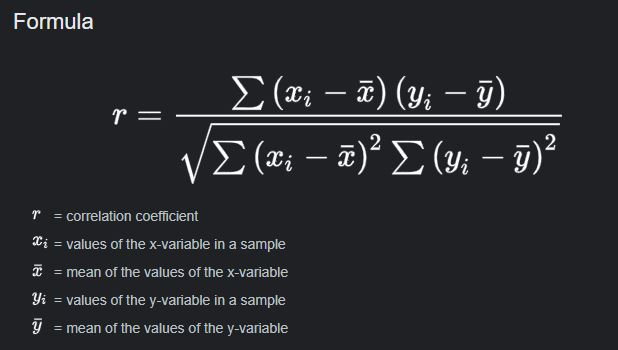

In [131]:
from PIL import Image
from IPython.display import display
im = Image.open("/content/PCF.JPG")
display(im)

In [132]:
correlation_coefficient, _ = pearsonr(df['Adj Close'], df['Volume'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.2218121873844438


A correlation coefficient of -0.2218 indicates a weak negative correlation between two variables. Here's an explanation of what this correlation coefficient means:

Correlation Strength: The correlation coefficient is a numerical value that ranges from -1 to 1.

When the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well.
When the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease.
When the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the variables.
Negative Correlation: In this case, the correlation coefficient is negative (-0.2078), indicating a weak negative correlation. This means that as one variable increases, the other variable tends to decrease slightly, and vice versa.

Strength of the Correlation: The absolute value of the correlation coefficient (0.2078 in this case) is less than 0.3. Typically, correlation coefficients with absolute values below 0.3 are considered weak correlations.

Interpretation: In practical terms, if you have two variables, X and Y, with a correlation coefficient of -0.2218, it suggests that there is a very weak tendency for them to move in opposite directions. However, the relationship is not strong enough to make reliable predictions about one variable based on the other. In other words, changes in one variable do not strongly indicate or predict changes in the other variable.

Scatter Plot: When you plot a scatter diagram of these two variables with a negative correlation coefficient, you may observe a scattered pattern of points that do not follow a clear linear trend. The points may be scattered around the plot, indicating the weak negative relationship.

In summary, a correlation coefficient of -0.2218 suggests a weak negative linear relationship between the two variables. It is important to note that correlation does not imply causation, and other factors may be influencing the relationship between these variables. If you are interested in understanding the relationship more deeply or making predictions, further analysis or additional data may be needed.

**Plotting a scatter plot using Pearson Correlation Coefficient and fitting a trend line using Polynomial Regression**

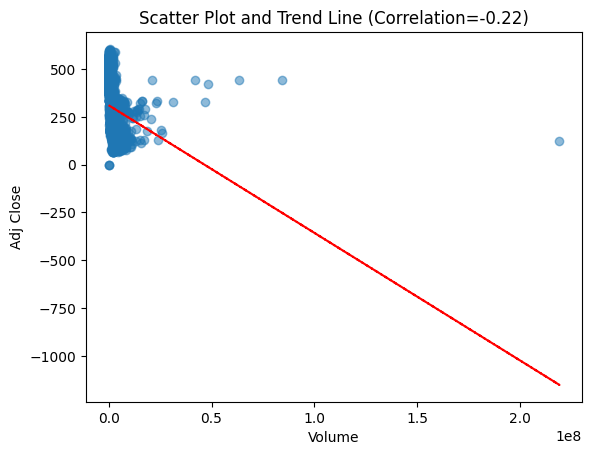

In [133]:
plt.scatter(df['Volume'], df['Adj Close'], alpha=0.5)
plt.title(f'Scatter Plot and Trend Line (Correlation={correlation_coefficient:.2f})')
plt.xlabel('Volume')
plt.ylabel('Adj Close')
z = np.polyfit(df['Volume'], df['Adj Close'], 1)
p = np.poly1d(z)
plt.plot(df['Volume'], p(df['Volume']), "r--")
plt.show()

**Calculating Index Numbers: To calculate an index, selected a base as '2020-01-01' period and calculate the relative changes in your chosen variable over time.**

In [138]:
base_period = '2020-01-01'
df['Price_Index'] = (df['Adj Close'] / df.loc[base_period]['Adj Close']) * 100

**Plotting Index Numbers: Using matplotlib to plot the index numbers over time.**

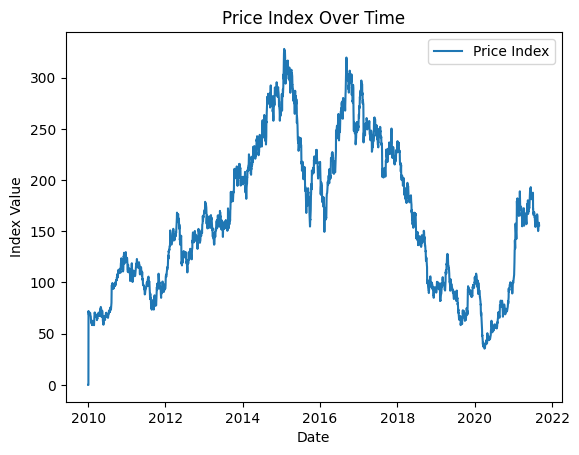

In [139]:
plt.plot(df.index, df['Price_Index'], label='Price Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Price Index Over Time')
plt.legend()
plt.show()

**Forecasting from the above observations: To forecast the data for the next five years, we can use time series forecasting techniques such as ARIMA**

In [140]:
from statsmodels.tsa.arima.model import ARIMA

# Taking 'Adj Close' is your variable of interest
data = df['Adj Close']

# Fit an ARIMA model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# Forecast for the next five years
forecast_steps = 5 * 252  # Taking 252 trading days in a year
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2021-09-02    287.288373
2021-09-03    287.271604
2021-09-04    287.267041
2021-09-05    287.265800
2021-09-06    287.265462
                 ...    
2025-02-08    287.265336
2025-02-09    287.265336
2025-02-10    287.265336
2025-02-11    287.265336
2025-02-12    287.265336
Freq: D, Name: predicted_mean, Length: 1260, dtype: float64


**Plotting the forecast for the next 5 years using line chart using ARIMA**

<ipython-input-141-f784792d033a>:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


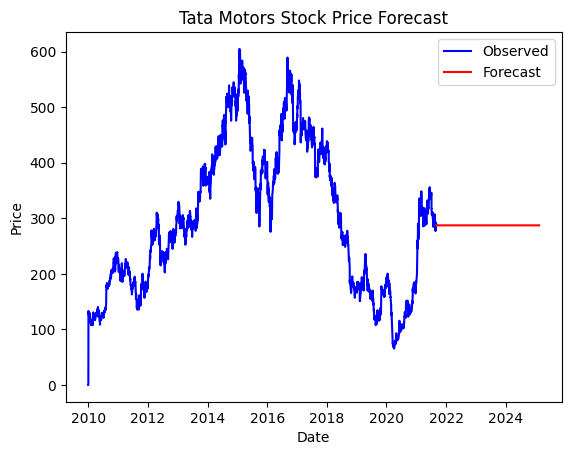

<Figure size 2500x1200 with 0 Axes>

In [141]:
# Fit an ARIMA model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

# Forecast for the next five years (adjust the number of steps accordingly)
forecast_steps = 5 * 252  # Assuming 252 trading days in a year
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of dates for the forecast period (e.g., five years)
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the observed data
plt.plot(data.index, data.values, label='Observed', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tata Motors Stock Price Forecast')

# Show legend
plt.legend()

# Display the plot
plt.figure(figsize=(25,12))
plt.show()

**Plotting the forecast for the next 5 years using line chart using ExponentialSmoothing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-142-cbc4d9ebd781>:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


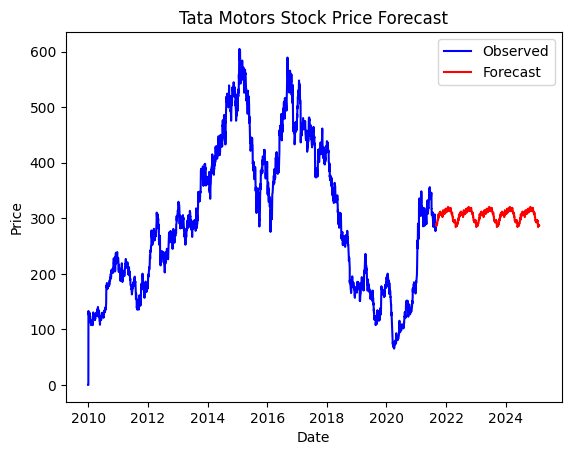

<Figure size 2500x1200 with 0 Axes>

In [142]:
# Fit an ExponentialSmoothing model
model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=252)
model_fit = model.fit()

# Forecast for the next five years (adjust the number of steps accordingly)
forecast_steps = 5 * 252  # Assuming 252 trading days in a year
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of dates for the forecast period (e.g., five years)
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the observed data
plt.plot(data.index, data.values, label='Observed', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tata Motors Stock Price Forecast')

# Show legend
plt.legend()

# Display the plot
plt.figure(figsize=(25,12))
plt.show()

**Plotting the forecast for the next 5 years using line chart using Seasonal Decomposition of Time Series (STL) model**

<ipython-input-143-91104a5904b8>:13: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')


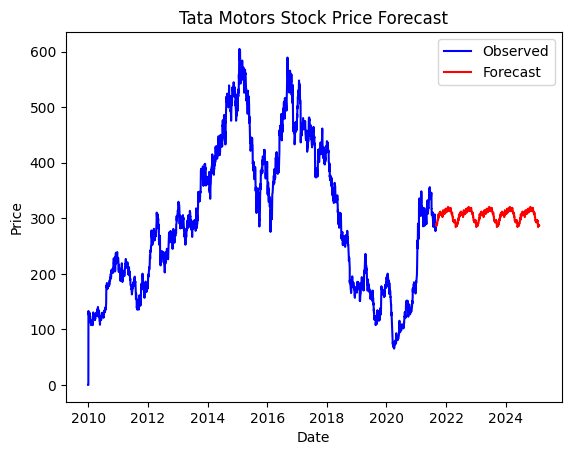

<Figure size 2500x1200 with 0 Axes>

In [143]:
# Fit an Seasonal Decomposition of Time Series (STL) model
from statsmodels.tsa.seasonal import STL

stl = STL(data, seasonal=13)  # Seasonal period (e.g., 13 for monthly data)
result = stl.fit()


# Forecast for the next five years (adjust the number of steps accordingly)
forecast_steps = 5 * 252  # Assuming 252 trading days in a year
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of dates for the forecast period (e.g., five years)
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, closed='right')

# Plot the observed data
plt.plot(data.index, data.values, label='Observed', color='blue')

# Plot the forecasted data
plt.plot(forecast_dates, forecast, label='Forecast', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tata Motors Stock Price Forecast')

# Show legend
plt.legend()

# Display the plot
plt.figure(figsize=(25,12))
plt.show()